In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import kmodes as KModes

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("bankmarketing.csv")
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df.shape

(41188, 21)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
df = df[['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome','age','duration','euribor3m']]
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,56,261,4.857
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,57,149,4.857
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,37,226,4.857
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40,151,4.857
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,56,307,4.857


In [24]:
df.isnull().sum()

job            0
marital        0
education      0
default        0
housing        0
loan           0
contact        0
month          0
day_of_week    0
poutcome       0
age            0
duration       0
euribor3m      0
clusters       0
dtype: int64

In [7]:
from sklearn import preprocessing

In [9]:
le = preprocessing.LabelEncoder()

In [8]:
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']

In [10]:
df[cols] = df[cols].apply(le.fit_transform)
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,3,1,0,0,0,0,1,6,1,1,56,261,4.857
1,7,1,3,1,0,0,1,6,1,1,57,149,4.857
2,7,1,3,0,2,0,1,6,1,1,37,226,4.857
3,0,1,1,0,0,0,1,6,1,1,40,151,4.857
4,7,1,3,0,0,2,1,6,1,1,56,307,4.857


In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

df[['age','duration','euribor3m']] = scaler.fit_transform(df[['age','duration','euribor3m']])

df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m
0,3,1,0,0,0,0,1,6,1,1,1.533034,0.010471,0.71246
1,7,1,3,1,0,0,1,6,1,1,1.628993,-0.421501,0.71246
2,7,1,3,0,2,0,1,6,1,1,-0.290186,-0.124520,0.71246
3,0,1,1,0,0,0,1,6,1,1,-0.002309,-0.413787,0.71246
4,7,1,3,0,0,2,1,6,1,1,1.533034,0.187888,0.71246


In [14]:
from kmodes.kprototypes import KPrototypes

In [17]:
kproto = KPrototypes(n_clusters=5 , init="Cao")
clusters = kproto.fit_predict(df, categorical=[10,11,12])

In [18]:
kproto.cost_

550977.9266551583

In [21]:
df["clusters"] = clusters

In [22]:
df.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age,duration,euribor3m,clusters
0,3,1,0,0,0,0,1,6,1,1,1.533034,0.010471,0.71246,1
1,7,1,3,1,0,0,1,6,1,1,1.628993,-0.421501,0.71246,4
2,7,1,3,0,2,0,1,6,1,1,-0.290186,-0.124520,0.71246,4
3,0,1,1,0,0,0,1,6,1,1,-0.002309,-0.413787,0.71246,1
4,7,1,3,0,0,2,1,6,1,1,1.533034,0.187888,0.71246,4


In [25]:
cost = []

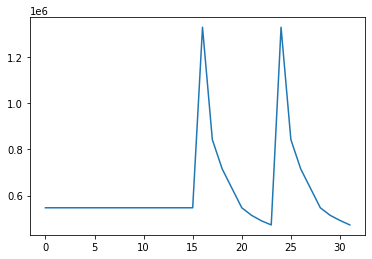

In [29]:
for num_cust in list(range(1,9)):
    kproto = KPrototypes(n_clusters=num_cust , init="Cao")
    kproto.fit_predict(df, categorical=[10,11,12])
    cost.append(kproto.cost_)



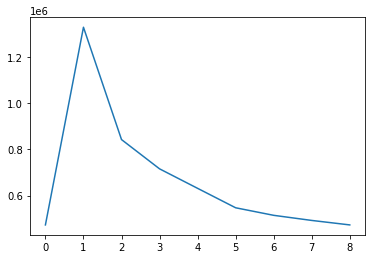

In [36]:
plt.plot(cost[-9:])    
plt.show()

[473306.5675427614,
 1328363.232173759,
 842475.3761323243,
 715863.4021573893,
 631519.6633769713,
 547437.1519450318,
 514788.5525231259,
 492695.3998879254,
 473306.5675427614]